In [2]:
import numpy as np
import matplotlib.pyplot as plt

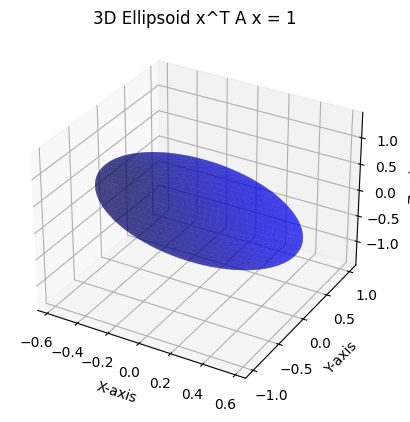

In [4]:
def draw_ellipsoid(A):   
    """
    Draws a 3D ellipsoid using the equation x^T A x = 1.
    
    Parameters:
    - A: 3x3 matrix that defines the ellipsoid.
    """
    
    # Eigen-decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(A)
    
    # Check for positive definiteness
    if np.all(eigenvalues > 0):
        # Create a unit sphere
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, np.pi, 100)
        x = np.outer(np.cos(u), np.sin(v))
        y = np.outer(np.sin(u), np.sin(v))
        z = np.outer(np.ones_like(u), np.cos(v))
        
        # Transform the unit sphere into the ellipsoid using the eigenvectors and eigenvalues
        for i in range(len(u)):
            for j in range(len(v)):
                point = [x[i,j], y[i,j], z[i,j]]
                transformed_point = eigenvectors @ np.diag(np.sqrt(1.0/eigenvalues)) @ point
                x[i,j], y[i,j], z[i,j] = transformed_point
                
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(x, y, z, color='b', alpha=0.5)
        
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_zlabel('Z-axis')
        plt.title('3D Ellipsoid x^T A x = 1')
        plt.show()

    else:
        print("The matrix is not positive definite. Cannot visualize the ellipsoid.")

# Example usage:
A = np.array([[3, 1, 0], [0, 2, 0], [0, 1, 1]])  # Example matrix
draw_ellipsoid(A)
    